# 4.1.5.1 Principal Component Regression (PCR)
#### Explanation of Principal Component Regression and Its Applications

**Principal Component Regression (PCR)** is a technique that combines Principal Component Analysis (PCA) with Linear Regression. PCR addresses the issue of multicollinearity by transforming the predictors into a set of orthogonal principal components, which are then used as inputs to the linear regression model.

**Key Concepts**:
- **Principal Component Analysis (PCA)**: A dimensionality reduction technique that transforms the original features into a set of linearly uncorrelated components (principal components) that capture the maximum variance in the data.
- **Linear Regression on Principal Components**: After transforming the predictors into principal components, linear regression is performed using these components as predictors.

**Applications of Principal Component Regression**:
- **Multicollinearity Handling**: PCR is particularly useful when predictors are highly correlated.
- **Dimensionality Reduction**: By using only the top principal components, PCR can reduce the dimensionality of the dataset, which helps in improving the model's performance and interpretability.
- **Data Compression**: Effective in scenarios where data needs to be compressed without losing significant information.

In this section, we will explore the implementation of Principal Component Regression using scikit-learn.


<hr><hr>

## Readings:
- [Principal Component Regression — Clearly Explained and Implemented](https://readmedium.com/en/https:/towardsdatascience.com/principal-component-regression-clearly-explained-and-implemented-608471530a2f)
- [Understand Principal Component Regression (PCR)](https://readmedium.com/en/https:/blog.mirkopeters.com/understand-principal-component-regression-pcr-in-machine-learning-33b0913b5cd8)
- [2.4 Dimentionality Reduction](https://github.com/AdArya125/Machine-Learning---The-Journey/blob/main/2.%20Data%20Preprocessing%20and%20Feature%20Engineering/2.4%20Dimensionality%20Reduction/README.md)

<hr><hr>


## Procedure for Principal Component Regression (PCR)

1. **Standardize the Data**:
   Standardizing the predictors to have mean zero and variance one.

2. **Perform PCA**:
   Apply Principal Component Analysis (PCA) to transform the original predictors into principal components.

3. **Select Principal Components**:
   Choose the top principal components that capture the most variance in the data.

4. **Fit Linear Regression**:
   Use the selected principal components as predictors in a linear regression model.

5. **Predict and Evaluate**:
   Make predictions using the fitted model and evaluate its performance using appropriate metrics.


In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Generating some random data for demonstration
np.random.seed(0)
X = 2 * np.random.rand(100, 3)
Y = 4 + 3 * X[:, 0] + 2 * X[:, 1] + X[:, 2] + np.random.randn(100)

print("X: \n",X[:5,:])
print("Y: \n",Y[:5])

X: 
 [[1.09762701 1.43037873 1.20552675]
 [1.08976637 0.8473096  1.29178823]
 [0.87517442 1.783546   1.92732552]
 [0.76688304 1.58345008 1.05778984]
 [1.13608912 1.85119328 0.14207212]]
Y: 
 [11.51567178 10.48788756 11.52262472 10.28741738  9.82866513]


In [3]:
# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Performing PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [5]:
# Selecting the top principal components (for demonstration, we'll use all components)
n_components = X.shape[1]
X_pca_reduced = X_pca[:, :n_components]

In [6]:
# Implementing Linear Regression on principal components
linear_regressor = LinearRegression()
linear_regressor.fit(X_pca_reduced, Y)

# Predicting
Y_pred_pcr = linear_regressor.predict(X_pca_reduced)

# Evaluating the model
mse = mean_squared_error(Y, Y_pred_pcr)
r2 = r2_score(Y, Y_pred_pcr)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.8649554392471598
R-squared: 0.8448379108798427


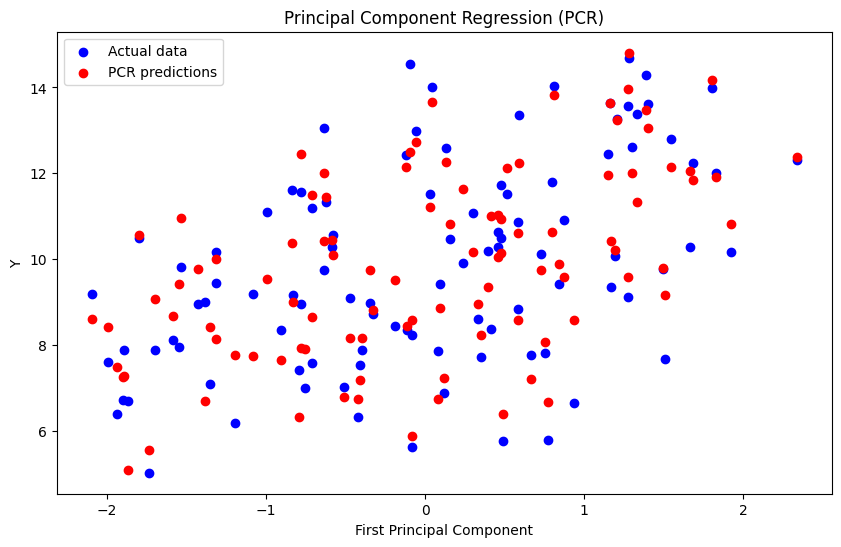

In [7]:
# Plotting the results (for demonstration, we'll plot against the first principal component)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], Y, color='blue', label='Actual data')
plt.scatter(X_pca[:, 0], Y_pred_pcr, color='red', label='PCR predictions')
plt.xlabel('First Principal Component')
plt.ylabel('Y')
plt.title('Principal Component Regression (PCR)')
plt.legend()
plt.show()

## Conclusion

Principal Component Regression (PCR) is a valuable technique for addressing multicollinearity and reducing dimensionality in datasets. By transforming the original predictors into uncorrelated principal components, PCR provides a stable and interpretable model that captures the most significant variance in the data. Implementing PCR using scikit-learn is efficient and straightforward, allowing for easy application to various datasets. Proper selection of the number of principal components is crucial for optimizing model performance and balancing between dimensionality reduction and predictive accuracy.
